In [ ]:
%pip install httpx pandas pandas_ta matplotlib seaborn plotly requests beautifulsoup4 lxml mplfinance finnhub-python binance python-binance pandasai scikit-learn numpy rich

# 5 - Calculer une Moyenne Mobile Exponentielle (EMA)

## Étape 1: Récupération des Données Financières

In [7]:
import requests
import json
import pandas as pd

def fetch_data_from_api(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Raise HTTPError for bad responses
        data = json.loads(response.text)
        historical_data = data['historical']
        return pd.DataFrame(historical_data)
    except requests.HTTPError as e:
        print(f"Failed to fetch data from API. HTTPError: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Replace 'YOUR_API_KEY' with your Financial Modeling Prep API key
url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=<YOUR_API_KEY>"

# Fetch data from API
df = fetch_data_from_api(url)

# Fallback to CSV if API call fails
if df is None:
    csv_fallback_path = './5.0-project/apple_stock_data.csv'  # Change this to your fallback CSV path
    print(f"Falling back to CSV file at {csv_fallback_path}")
    df = pd.read_csv(csv_fallback_path)

# Save DataFrame to CSV file (if fetched from API)
if df is not None:
    csv_file_path = './5.0-project/apple_stock_data.csv'  # Change this to your desired path
    df.to_csv(csv_file_path, index=False)
    print(f"Data has been saved to {csv_file_path}")

In [19]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame(historical_data)

# Convert 'date' to datetime type
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df.sort_values('date', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [20]:
# Calculate 20-day EMA
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()
pd.DataFrame(df['EMA_20'])

,EMA_20
0,55.010000
1,54.953810
2,54.977256
3,55.031803
4,55.039251
...,...
1252,180.872442
1253,180.383638
1254,179.871863
1255,179.690733


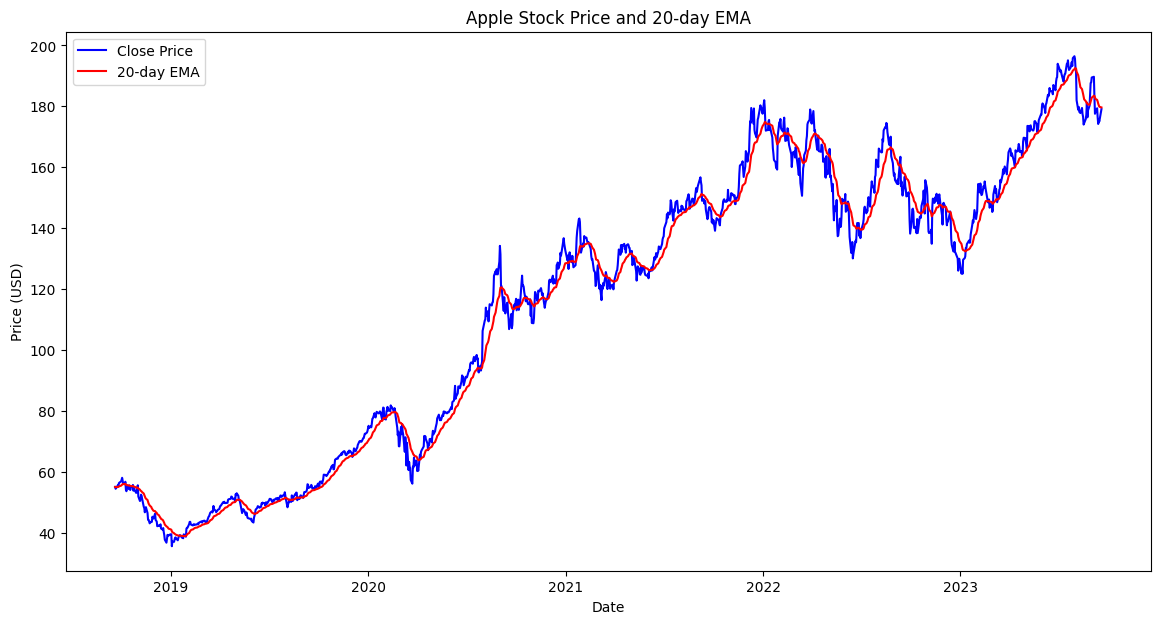

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot close price
plt.plot(df['date'], df['close'], label='Close Price', color='blue')

# Plot 20-day EMA
plt.plot(df['date'], df['EMA_20'], label='20-day EMA', color='red')

plt.title('Apple Stock Price and 20-day EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.show()

In [22]:
# Calculate 9-day EMA
df['EMA_9'] = df['close'].ewm(span=9, adjust=False).mean()

# Calculate 12-day EMA
df['EMA_12'] = df['close'].ewm(span=12, adjust=False).mean()

# Calculate 20-day EMA (Already provided)
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()

# Calculate 26-day EMA
df['EMA_26'] = df['close'].ewm(span=26, adjust=False).mean()

# Calculate 50-day EMA
df['EMA_50'] = df['close'].ewm(span=50, adjust=False).mean()

# Calculate 100-day EMA
df['EMA_100'] = df['close'].ewm(span=100, adjust=False).mean()

# Calculate 200-day EMA
df['EMA_200'] = df['close'].ewm(span=200, adjust=False).mean()

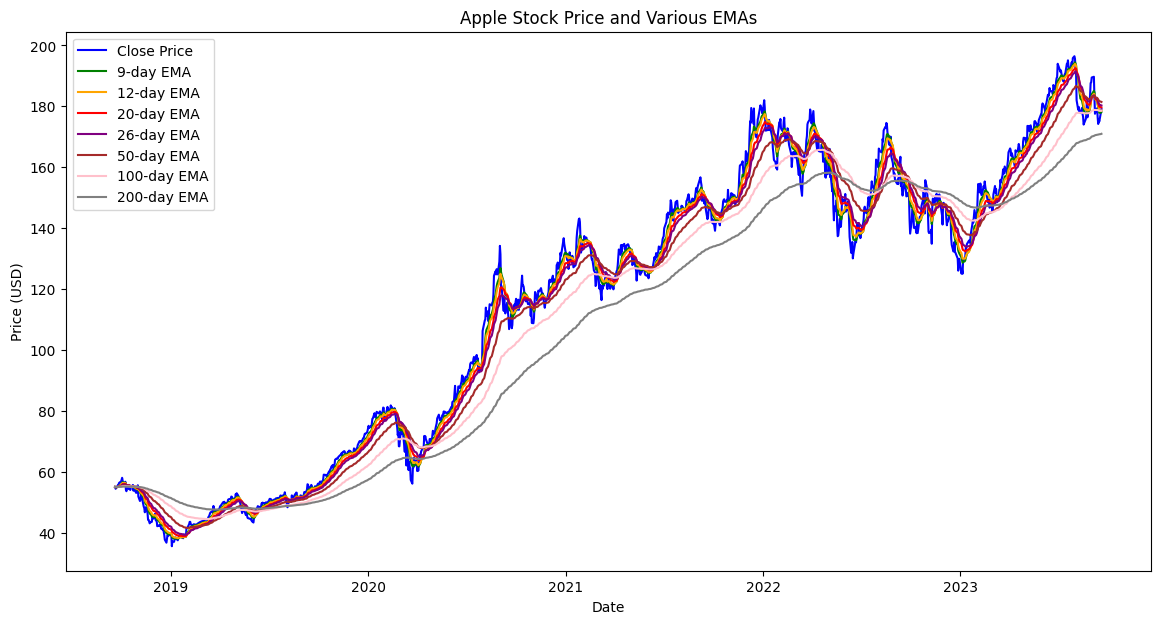

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot close price
plt.plot(df['date'], df['close'], label='Close Price', color='blue')

# Plot 9-day EMA
plt.plot(df['date'], df['EMA_9'], label='9-day EMA', color='green')

# Plot 12-day EMA
plt.plot(df['date'], df['EMA_12'], label='12-day EMA', color='orange')

# Plot 20-day EMA
plt.plot(df['date'], df['EMA_20'], label='20-day EMA', color='red')

# Plot 26-day EMA
plt.plot(df['date'], df['EMA_26'], label='26-day EMA', color='purple')

# Plot 50-day EMA
plt.plot(df['date'], df['EMA_50'], label='50-day EMA', color='brown')

# Plot 100-day EMA
plt.plot(df['date'], df['EMA_100'], label='100-day EMA', color='pink')

# Plot 200-day EMA
plt.plot(df['date'], df['EMA_200'], label='200-day EMA', color='gray')

plt.title('Apple Stock Price and Various EMAs')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.show()